# The Curse of Dimensionality - Lab

## Introduction

In this lab, you'll conduct some mathematical simulations to further investigate consequences of the curse of dimensionality.

## Objectives

You will be able to:

* Define a Euclidean Distance Function for n-dimensional space
* Plot a graph displaying how sparsity increases with n for n-dimensional spaces
* Demonstrate how training time increases exponentially as the number of features increases for supervised learning algorithms


## Sparseness in n-Dimensional Space

As discussed, points in n-dimensional space become increasingly sparse as the number of dimensions increases. To demonstrate this, you'll write a function to calculate the euclidean distance between two points. From there, you'll then generate random points in n-dimensional space, calculate their average distance from the origin, and plot the relationship between this average distance and n.

## Euclidean Distance

To start, write a function which takes two points, p1 and p2, and returns the Euclidean distance between them. Recall that the Euclidean distance between two points is given by:  

$$ d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2} $$

In [1]:
import numpy as np

In [2]:
def euclidean_distance(p1, p2):
    distances = []
    
    #Your code here
    
    for i in range(0, len(p1)):
        distance = (p1[i] - p2[i])**2
        distances.append(distance)
    
    euc_distance = np.sqrt(sum(distances))
    return euc_distance
        

## Average Distance From the Origin

To examine the curse of dimensionality, you'll investigate the average distance to the center of n-dimensional space. As you'll see, this average distance increases as the number of dimensions increases. To investigate this, generate 100 random points for various n-dimensional spaces. Investigate n-dimensional spaces from n=1 to n=1000. In each of these, construct the 100 random points using a random number between -10 and 10 for each dimension of the point. From there, calculate the average distance from each of these points to the origin. Finally, plot this relationship on a graph; the x-axis will be the n, the number of dimensions, and the y-axis will be the average distance from the origin.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [8]:
#Your code here

random_points = []

for n in range(1,1001):
    vectors = np.random.uniform(-10,10,n)
    random_points.append(vectors)
    
    

In [10]:
distances = []

for i in range(0, len(random_points)):
    distance = euclidean_distance(np.zeros(i+1),random_points[i])
    distances.append(distance)

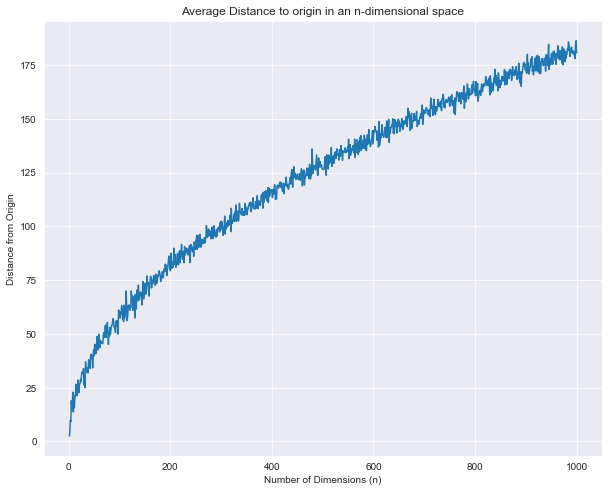

In [12]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,1001)), distances)
plt.xlabel('Number of Dimensions (n)')
plt.ylabel('Distance from Origin')
plt.title('Average Distance to origin in an n-dimensional space')
plt.show()

## Convergence Time

As you've heard, another issue with increasing feature space is the training time required to fit a machine learning model. While more data will generally lead to better predictive results, it will also substantially increase training time. To demonstrate this, generate lists of random numbers as you did above. Then, use this list of random numbers as a feature in a mock dataset; choose an arbitrary coefficient and multiply the feature vector by this coefficient. Then sum these feature-coefficient products to get an output y. To spice things up (and not have a completely deterministic relationship), add a normally distributed white noise parameter to your output values. Fit an ordinary least squares model to your generated mock data. Repeat this for a varying number of features, and record the time required to fit the model. (Be sure to only record the time to train the model, not the time to generate the data.) Finally, plot the number of features, n, versus the training time for the subsequent model.

⏰ Your code may take about a minute to run. 

In [27]:
import pandas as pd
import datetime
import time
from sklearn.linear_model import LinearRegression, Lasso

In [53]:
#Your code here

random_points = []

for n in range(1,1001):
    vector = []
    for j in range(0,500):
        vectors = np.random.uniform(-10,10,n)
        vector.append(vectors)
    random_points.append(vector)


In [54]:
outputs = []
for i in range(0, len(random_points)):
    y = []
    for j in range(0,500):
        output = np.sum(5*random_points[i][j] + np.random.normal(0,1))
        y.append(output)
    outputs.append(y)
    

In [55]:
times = []

for i in range(0, len(random_points)):
    start = time.time()
    reg = LinearRegression().fit(random_points[i], outputs[i])
    end = time.time()
    duration = end-start
    times.append(duration)



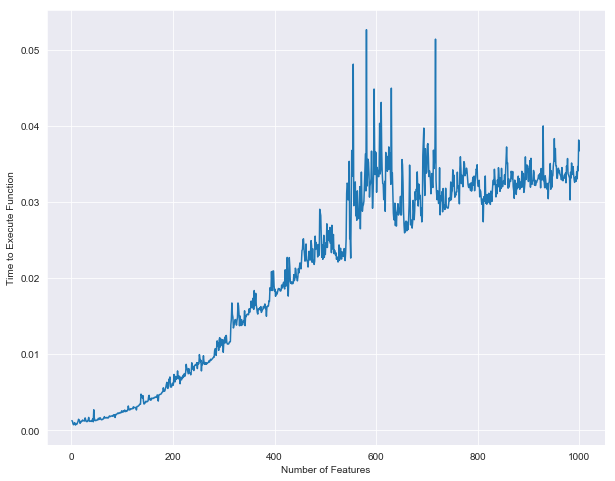

In [56]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,1001)),times)
plt.xlabel('Number of Features')
plt.ylabel('Time to Execute Function')
plt.show()

## Repeat the Same Experiment for a Lasso Penalized Regression Model

⏰ Your code may take over a minute to run. 

In [57]:

times = []

for i in range(0, len(random_points)):
    start = time.time()
    reg = Lasso().fit(random_points[i], outputs[i])
    end = time.time()
    duration = end-start
    times.append(duration)


/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81413.24669847824, tolerance: 28828.670065079506
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33954.33492982015, tolerance: 28067.049956482006
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45964.85420541931, tolerance: 31757.1604929599
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111651.13390538376, tolerance: 35171.90148908264
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292774.9680497423, tolerance: 29374.25272207544
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121138.07615102408, tolerance: 36175.02975200366
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You migh

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186766.837032779, tolerance: 39264.86422044182
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335404.4823138218, tolerance: 41508.96155172899
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118578.51872485166, tolerance: 37106.48777581925
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might 

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309684.87403530104, tolerance: 39793.1634705849
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289608.9849613519, tolerance: 38821.2971385839
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117520.1430598707, tolerance: 42173.7625057375
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might wa

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165014.14570476394, tolerance: 45137.76919900583
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265668.69334670773, tolerance: 44017.49762434348
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316528.7474660612, tolerance: 37576.642241941314
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You mig

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227382.52140856415, tolerance: 49212.33569696305
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198316.40765684558, tolerance: 41677.018097796405
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318064.29638276633, tolerance: 46224.766218505254
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You m

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305483.2742218481, tolerance: 46786.4074686029
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193079.43723598286, tolerance: 45171.38045702458
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338787.2173214767, tolerance: 54057.2594723795
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might w

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326215.7771618, tolerance: 56604.60839418575
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310462.01319193805, tolerance: 53258.506532031715
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233031.437131745, tolerance: 48807.757769441996
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might w

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350311.4857814735, tolerance: 51747.74065198498
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253894.59266982152, tolerance: 53831.65764168153
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304451.1762041704, tolerance: 59097.969667803576
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You migh

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280445.3775820072, tolerance: 59930.509865104825
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242689.94994399633, tolerance: 48845.54507205734
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379284.3473986209, tolerance: 58793.86991488643
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You migh

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329600.6618511587, tolerance: 70797.11756867709
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229100.62419266015, tolerance: 62049.82637759503
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275698.82937383355, tolerance: 69214.55266628749
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You migh

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348494.92582573707, tolerance: 61221.2416543712
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368631.1730781019, tolerance: 66210.55125609926
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272224.39855952834, tolerance: 66213.77432362371
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374315.64549949404, tolerance: 70689.72532779265
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386164.72205034486, tolerance: 71152.42626456941
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478198.6397029966, tolerance: 79133.71868569305
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You migh

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451036.19029163773, tolerance: 75498.33922922438
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388125.72409011755, tolerance: 72906.0794708962
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361117.8825520525, tolerance: 74253.92515061346
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312573.1293659302, tolerance: 76411.88539407997
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343016.75616313686, tolerance: 80865.1243124841
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402149.7729975404, tolerance: 73879.25537991172
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might 

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283685.1079778714, tolerance: 78717.66646668695
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404687.9983179185, tolerance: 80747.70137556472
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430344.2185174251, tolerance: 82081.04499837088
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might 

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487945.8367592732, tolerance: 93508.89381012332
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454560.7788843682, tolerance: 85825.85677411231
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341332.4939869224, tolerance: 74910.90297240575
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might 

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411252.7258483466, tolerance: 89063.83779496809
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475184.3841142501, tolerance: 86536.69218181295
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588585.9264348613, tolerance: 85403.0240322063
  positive)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might w

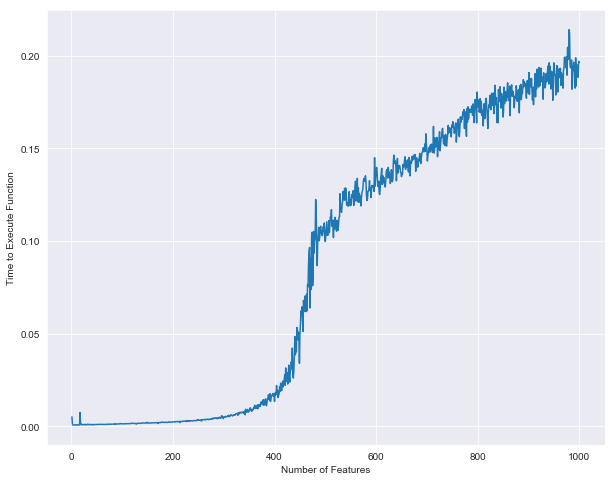

In [58]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,1001)),times)
plt.xlabel('Number of Features')
plt.ylabel('Time to Execute Function')
plt.show()

## Optional: Show Just How Slow it Can Go!

If you're up for putting your computer through the ringer and are very patient to allow the necessary computations, try increasing the maximum n from 1000 to 10,000 using Lasso regression. You should see an interesting pattern unveil. See if you can make any hypotheses as to why this might occur!

_Note:_ ⏰ _You can expect your code to take over an hour to run on a 2.7 GHz speed CPU!_

In [ ]:
#Your code here

## Summary

In this lab, you conducted various simulations to investigate the curse of dimensionality. This demonstrated some of the caveats of working with large datasets with an increasing number of features. With that, the next section will start to explore Primary Component Analysis, a means of reducing the number of features in a dataset while preserving as much information as possible.